<a href="https://colab.research.google.com/github/MhammadRezaValiYari/GoldTransectionAnalysisLinearRegression/blob/main/GoldTransectionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import essesional library

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

read data from drive

In [2]:
data = yf.download('GC=F', start='2023-12-27', end='2024-12-27')
data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head(2)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2023-12-27,2081.899902,2081.899902,2081.899902,2064.800049,2067.300049,586
2023-12-28,2073.899902,2073.899902,2087.300049,2066.500000,2081.600098,338


In [28]:
def clean_columns(data):
  if 'Date' in data.columns:
      data = data.set_index('Date')
  data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
  data.columns = [col.replace('GC=F', ' ') for col in data.columns]
  if data.index.name == "Date":
      data = data.reset_index()

In [29]:
clean_columns(data)

In [30]:
data.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-12-27,2081.899902,2081.899902,2081.899902,2064.800049,2067.300049,586
1,2023-12-28,2073.899902,2073.899902,2087.300049,2066.500000,2081.600098,338


In [31]:
data = data.reset_index()

In [32]:
data.head(2)

,index,Date,Adj Close,Close,High,Low,Open,Volume
0,0,2023-12-27,2081.899902,2081.899902,2081.899902,2064.800049,2067.300049,586
1,1,2023-12-28,2073.899902,2073.899902,2087.300049,2066.500000,2081.600098,338


In [33]:
data.columns

Index(['index', 'Date', 'Adj Close  ', 'Close  ', 'High  ', 'Low  ', 'Open  ',
       'Volume  '],
      dtype='object')

In [70]:
Series = data[['Date', 'Close  ']]

In [71]:
Series.head(2)

,Date,Close
0,2023-12-27,2081.899902
1,2023-12-28,2073.899902


In [72]:
Series = Series.rename(columns={'Close  ': 'Close'})

In [73]:
Series

,Date,Close
0,2023-12-27,2081.899902
1,2023-12-28,2073.899902
2,2023-12-29,2062.399902
3,2024-01-02,2064.399902
4,2024-01-03,2034.199951
...,...,...
247,2024-12-19,2592.199951
248,2024-12-20,2628.699951
249,2024-12-23,2612.300049
250,2024-12-24,2620.000000


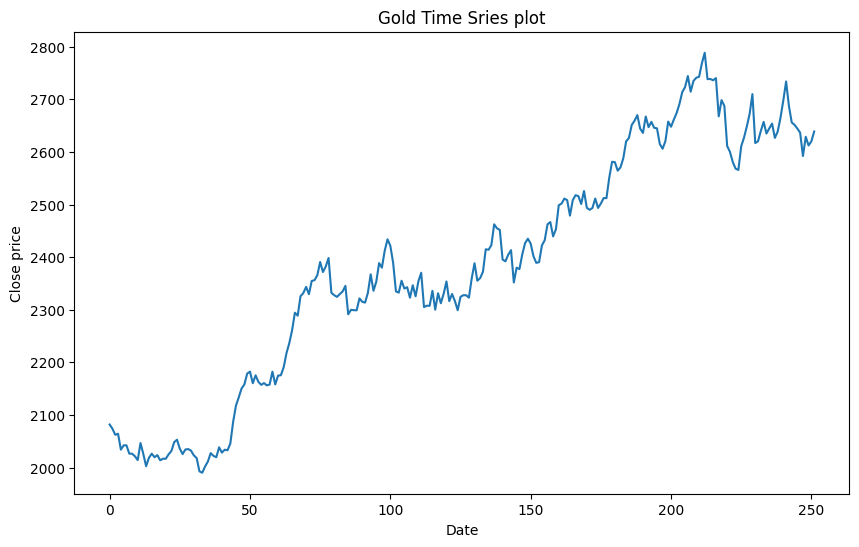

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(Series['Close'])
plt.title('Gold Time Sries plot')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()

## Decomposition

In [75]:
Series.columns

Index(['Date', 'Close'], dtype='object')

In [89]:
Series['Date'] = pd.to_datetime(Series['Date']).dt.date

In [90]:
Series.columns

Index(['Date', 'Close'], dtype='object')

In [91]:
Series.isna().sum()

,0
Date,0
Close,0


In [92]:
Series.duplicated(subset='Date').sum()

0

In [94]:
Series['Date']

,Date
0,2023-12-27
1,2023-12-28
2,2023-12-29
3,2024-01-02
4,2024-01-03
...,...
247,2024-12-19
248,2024-12-20
249,2024-12-23
250,2024-12-24


In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(Series['Close'], model='additive', period=252)
decompose_result.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 504 observations. x only has 252 observation(s)